# Heart disease Prediction 
Dataset from Kaggle (https://www.kaggle.com/johnsmith88/heart-disease-dataset) and will used Machine Learning Algorithm to predict whether any person is suffering from heart disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.model_selection import cross_val_score

# By using 2 algorithms
 1. KNeighborsClassifier
 2. RandomForestClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1025 non-null   int64
 1   sex       1025 non-null   int64
 2   cp        1025 non-null   int64
 3   trestbps  1025 non-null   int64
 4   chol      1025 non-null   int64
 5   fbs       1025 non-null   int64
 6   restecg   1025 non-null   int64
 7   thalach   1025 non-null   int64
 8   exang     1025 non-null   int64
 9   slope     1025 non-null   int64
 10  ca        1025 non-null   int64
 11  thal      1025 non-null   int64
 12  target    1025 non-null   int64
dtypes: int64(13)
memory usage: 104.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,3.000000,1.000000


# Feature Selection

In [6]:
import seaborn as sns
corrmat= df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot= True, cmap= "RdYlGn")

ModuleNotFoundError: No module named 'seaborn'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2FCC879A0>,
      dtype=object)

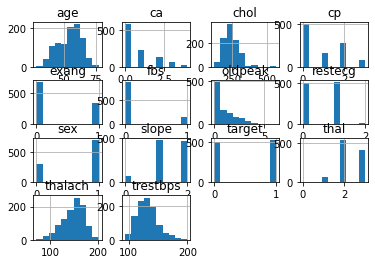

In [ ]:
df.hist()

# Let see data set is balanced or not


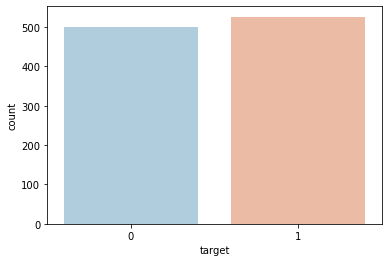

In [ ]:
#sns.set_style('whitegrid')
sns.countplot(x='target',data = df, palette='RdBu_r')

# Data Processing

In [ ]:
dataset= pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','ca','thal'])

In [ ]:
dataset.shape

(1025, 36)

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_4,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])


In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_4,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
X= dataset.drop(['target'],axis=1)
y= dataset['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2021)

In [ ]:
knn_scores = []
for k in range(1,31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

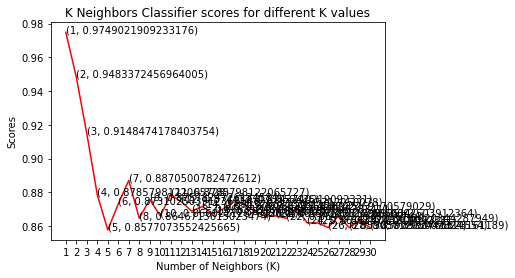

In [ ]:
plt.plot([k for k in range(1, 31)], knn_scores, color = 'red')
for i in range(1,31):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)
#score=cross_val_score(knn_classifier,X_train,y_train,cv=10)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

87.66233766233766


In [ ]:
#confusion mearix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred )
print(cm)

[[121  20]
 [ 18 149]]


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9837662337662337


In [ ]:
#confusion mearix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred )
print(cm)

[[141   0]
 [  5 162]]


- Random Forest classifier gives accuracy of 98% so will use random forest clf to make web app


In [ ]:
import pickle
pickle.dump(model, open('heart.pkl', 'wb'))